<a href="https://colab.research.google.com/github/MariamKhan98/mariamkhan98/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("cuisines.csv")
df.head()

,Unnamed: 0,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,65,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,66,indian,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,67,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,68,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,69,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [3]:
#based on ingredients we have to predict which cuisine it belogns to
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2448 entries, 0 to 2447
Columns: 385 entries, Unnamed: 0 to zucchini
dtypes: int64(384), object(1)
memory usage: 7.2+ MB


<Axes: ylabel='cuisine'>

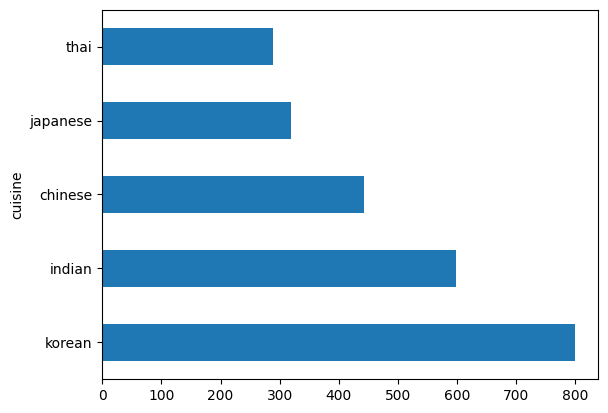

In [5]:
#plot to see how many cuisines we have
df['cuisine'].value_counts().plot.barh()

In [7]:
#ingredients based on cuisines

#lets create a df for each of the cuisine

thai = df[df['cuisine'] == 'thai']
japanese = df[df['cuisine'] == 'japanese']

korean = df[df['cuisine'] == 'korean']
indian = df[df['cuisine'] == 'indian']
chinese = df[df['cuisine'] == 'chinese']

print(f'thai: {thai.shape}')
print(f'japanese: {japanese.shape}')
print(f'korean: {korean.shape}')
print(f'indian: {indian.shape}')
print(f'chinese: {chinese.shape}')

thai: (289, 385)
japanese: (320, 385)
korean: (799, 385)
indian: (598, 385)
chinese: (442, 385)


In [8]:
#create ingredients so we can figure out how many have been usef for each cuisine

def create_ingredient_df(df):
    ingredient_df = df.T.drop(['cuisine', 'Unnamed: 0']).sum(axis=1).to_frame('value')
    ingredient_df = ingredient_df[(ingredient_df.T != 0).any()]

    ingredient_df = ingredient_df.sort_values(by='value', ascending=False, inplace=False)
    return ingredient_df

Text(0.5, 1.0, 'Thai Ingredients')

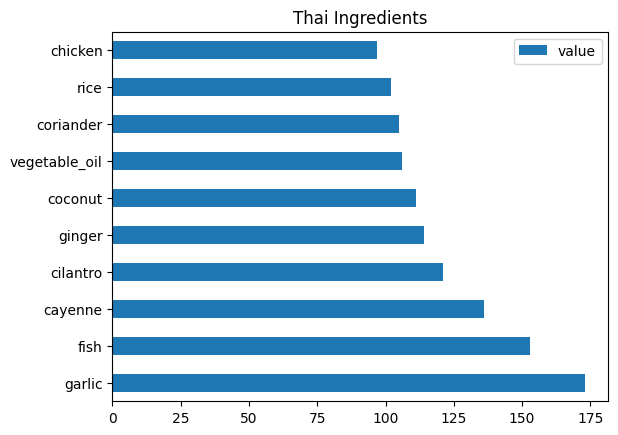

In [10]:
thai_df = create_ingredient_df(thai)
thai_ingredient_df = thai_df.head(10).plot.barh()
thai_ingredient_df.set_title('Thai Ingredients')

Text(0.5, 1.0, 'Japanese Ingredients')

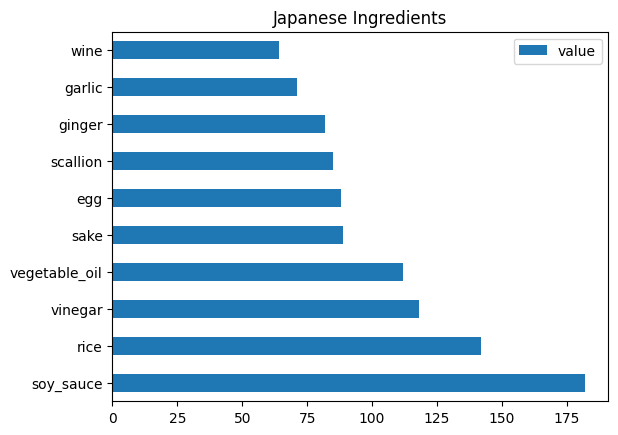

In [11]:
japanese_df = create_ingredient_df(japanese)
japanese_ingredient_df = japanese_df.head(10).plot.barh()
japanese_ingredient_df.set_title('Japanese Ingredients')
#

Text(0.5, 1.0, 'Chinese Ingredients')

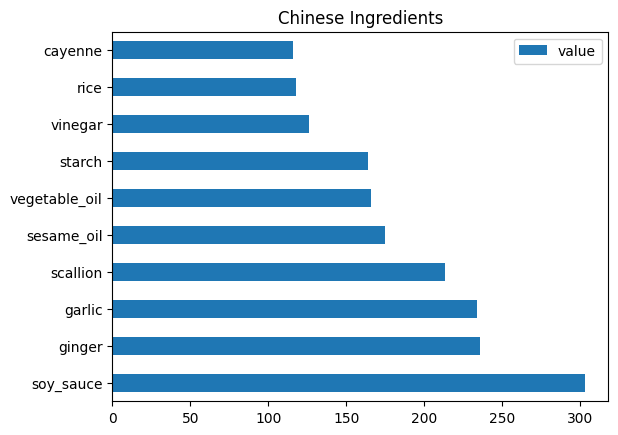

In [12]:
chinese_df = create_ingredient_df(chinese)
chinese_ingredient_df = chinese_df.head(10).plot.barh()
chinese_ingredient_df.set_title('Chinese Ingredients')

Text(0.5, 1.0, 'Indian Ingredients')

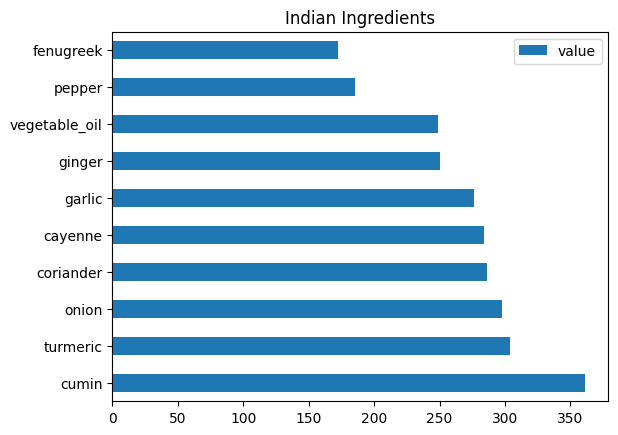

In [13]:
indian_df = create_ingredient_df(indian)
indian_ingredient_df = indian_df.head(10).plot.barh()
indian_ingredient_df.set_title('Indian Ingredients')
#

Text(0.5, 1.0, 'Korean Ingredients')

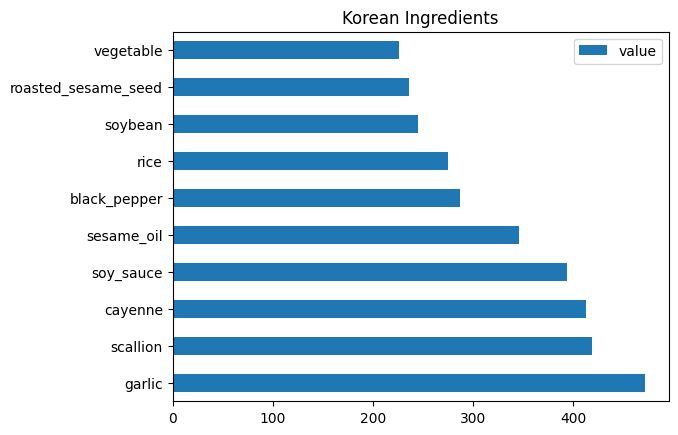

In [14]:
korean_df = create_ingredient_df(korean)
korean_ingredient_df = korean_df.head(10).plot.barh()
korean_ingredient_df.set_title('Korean Ingredients')

In [15]:
feature_df = df.drop(['cuisine', 'Unnamed: 0', 'rice', 'garlic', 'ginger'], axis=1)
labels_df = df.cuisine
feature_df.head()

,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [16]:
#to balance this use a technique called smote
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
transformed_features, transformed_labels = oversample.fit_resample(feature_df, labels_df)


In [17]:
print(f'new label count: {transformed_labels.value_counts()}')
print(f'old label count: {labels_df.value_counts()}')

new label count: cuisine
indian      799
thai        799
chinese     799
japanese    799
korean      799
Name: count, dtype: int64
old label count: cuisine
korean      799
indian      598
chinese     442
japanese    320
thai        289
Name: count, dtype: int64


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [29]:
X_train, X_test, y_train, y_test = train_test_split(transformed_features, transformed_labels, test_size=0.3)

In [30]:
lr = LogisticRegression(multi_class='ovr', solver='liblinear')
model = lr.fit(X_train, np.ravel(y_train))

accuracy_score = model.score(X_test, y_test)
print("Accuracy score: ", (accuracy_score))


Accuracy score:  0.8090075062552127


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [31]:
#lets see the probability of each of the ingredients

print(f'ingredients: {X_test.iloc[50][X_test.iloc[50]!=0].keys()}')
print(f'cuisine: {y_test.iloc[50]}')


ingredients: Index(['beef', 'cayenne', 'cilantro', 'fish', 'lime_juice', 'scallion',
       'shallot'],
      dtype='object')
cuisine: thai


In [36]:
test = X_test.iloc[50].values.reshape(-1, 1).T
proba = model.predict_proba(test)
classes = model.classes_
resultdf = pd.DataFrame(data=proba, columns=classes)

toppred = resultdf.T.sort_values(by=0, ascending=False)
toppred.head()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


,0
thai,0.951493
chinese,0.026331
korean,0.015060
indian,0.004068
japanese,0.003048


In [33]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     chinese       0.73      0.72      0.72       241
      indian       0.90      0.88      0.89       232
    japanese       0.76      0.79      0.77       234
      korean       0.87      0.81      0.84       267
        thai       0.78      0.85      0.81       225

    accuracy                           0.81      1199
   macro avg       0.81      0.81      0.81      1199
weighted avg       0.81      0.81      0.81      1199



In [35]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     chinese       0.73      0.72      0.72       241
      indian       0.90      0.88      0.89       232
    japanese       0.76      0.79      0.77       234
      korean       0.87      0.81      0.84       267
        thai       0.78      0.85      0.81       225

    accuracy                           0.81      1199
   macro avg       0.81      0.81      0.81      1199
weighted avg       0.81      0.81      0.81      1199

